## Identificación de genes involucrados en carcinogénesis viral  

Luz Rosario Guevara Cruz (lguevara@lcg.unam.mx)  \
Cristina Sotomayor Vivas (cristina@lcg.unam.mx)  

En este notebook realizaremos el análisis de la vía de señalización de carcinogénesis viral, con datos obtenidos de la base de datos KEGG.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from attributes import *

Primero, utilizaremos el script `analyze_pathways`, el cual nos permitirá descargar los datos de KEGG en un csv. Posteriormente, leeremos esos datos con las funciones del módulo `attributes`. El código de acceso de la vía de interés es 'hsa05203'. En una terminal corremos:

In [17]:
pathway_df = ReadPathways('data/hsa05203.csv')
pathway_df.head()

,Entry,Name,Position,Pathways
0,7157,tumor protein p53,17p13.1,"[(hsa01522, Endocrine resistance), (hsa01524, ..."
1,7337,ubiquitin protein ligase E3A,15q11.2,"[(hsa04120, Ubiquitin mediated proteolysis), (..."
2,1739,discs large MAGUK scaffold protein 1,3q29,"[(hsa04390, Hippo signaling pathway), (hsa0453..."
3,23513,scribble planar cell polarity protein,8q24.3,"[(hsa04390, Hippo signaling pathway), (hsa0453..."
4,5829,paxillin,12q24.23,"[(hsa04062, Chemokine signaling pathway), (hsa..."


Por medio de la columna 'Entry', podemos contar cuantas veces aparece cada gen, y posteriormente vemos cuáles se repiten más. 

In [3]:
counts = pathway_df.Entry.value_counts() 
counts[counts > 1].head()

7157    9
5291    4
8503    4
5296    4
5295    4
Name: Entry, dtype: int64

Consideramos que los genes que aparecen al menos 4 veces son los más significativos, nos enfocamos en ellos. 

In [4]:
signif_genes = counts[counts >= 4]

# Guardamos IDs
signif_genes_ids = signif_genes.index

In [24]:
# Quitamos líneas duplicadas del dataframe original 
pathway_df = pathway_df[~pathway_df.Entry.duplicated()]

# Separamos los genes significativos
genes_data = pathway_df[pathway_df.Entry.isin(signif_genes_ids)]
genes_data

,Entry,Name,Position,Pathways
0,7157,tumor protein p53,17p13.1,"[(hsa01522, Endocrine resistance), (hsa01524, ..."
49,5290,"phosphatidylinositol-4,5-bisphosphate 3-kinase...",3q26.32,"[(hsa00562, Inositol phosphate metabolism), (h..."
50,5291,"phosphatidylinositol-4,5-bisphosphate 3-kinase...",3q22.3,"[(hsa00562, Inositol phosphate metabolism), (h..."
51,5293,"phosphatidylinositol-4,5-bisphosphate 3-kinase...",1p36.22,"[(hsa00562, Inositol phosphate metabolism), (h..."
52,5295,phosphoinositide-3-kinase regulatory subunit 1,5q13.1,"[(hsa01521, EGFR tyrosine kinase inhibitor res..."
53,5296,phosphoinositide-3-kinase regulatory subunit 2,19p13.11,"[(hsa01521, EGFR tyrosine kinase inhibitor res..."
54,8503,phosphoinositide-3-kinase regulatory subunit 3,1p34.1,"[(hsa01521, EGFR tyrosine kinase inhibitor res..."
62,1017,cyclin dependent kinase 2,12q13.2,"[(hsa04068, FoxO signaling pathway), (hsa04110..."
154,1387,CREB binding protein,16p13.3,"[(hsa04024, cAMP signaling pathway), (hsa04066..."
155,2033,E1A binding protein p300,22q13.2,"[(hsa04024, cAMP signaling pathway), (hsa04066..."


In [6]:
genes_data.Name.to_list()

['tumor protein p53',
 'phosphatidylinositol-4,5-bisphosphate 3-kinase catalytic subunit alpha',
 'phosphatidylinositol-4,5-bisphosphate 3-kinase catalytic subunit beta',
 'phosphatidylinositol-4,5-bisphosphate 3-kinase catalytic subunit delta',
 'phosphoinositide-3-kinase regulatory subunit 1',
 'phosphoinositide-3-kinase regulatory subunit 2',
 'phosphoinositide-3-kinase regulatory subunit 3',
 'cyclin dependent kinase 2',
 'CREB binding protein',
 'E1A binding protein p300']

A pesar de ser 10 genes diferentes observamos que varios se refieren a subunidades del mismo complejo proteico, lo que sugiere que el complejo participa en el proceso de carcinogénesis. 

In [7]:
# Guardamos las repeticiones de genes en un DataFrame 
signif_df = signif_genes.to_frame().reset_index()
signif_df.columns = ['Entry', 'Repetitions']

In [8]:
# Añadimos repeticiones al DataFrame original
genes_data = genes_data.merge(signif_df)

Analizaremos ahora las vías de señalización en las que participan estos genes. Con la función `SplitData` del módulo `attributes`, separamos los datos, de modo que tenemos un renglón por cada vía de la lista encontrada en Pathways para cada gen. 

In [9]:
split_df = SplitData(genes_data)
split_df.head()

,Gene_ID,Gene_Name,Pathway_ID,Pathway_Name
0,7157,tumor protein p53,hsa01522,Endocrine resistance
1,7157,tumor protein p53,hsa01524,Platinum drug resistance
2,7157,tumor protein p53,hsa04010,MAPK signaling pathway
3,7157,tumor protein p53,hsa04071,Sphingolipid signaling pathway
4,7157,tumor protein p53,hsa04110,Cell cycle


Se obtiene el número de repeticiones de los pathways. 

In [10]:
path_counts = split_df.Pathway_Name.value_counts() 
path_counts[path_counts > 1]

Human T-cell leukemia virus 1 infection    10
Prostate cancer                            10
Hepatitis B                                10
Pathways in cancer                         10
Human papillomavirus infection             10
                                           ..
Long-term potentiation                      2
Adherens junction                           2
TGF-beta signaling pathway                  2
Notch signaling pathway                     2
Tuberculosis                                2
Name: Pathway_Name, Length: 117, dtype: int64

Vemos que muchas de las vías obtenidas son de cáncer, que surgen porque son genes asociados a esta enfermedad. Podemos preguntarnos específicamente por las vías de señalización involucradas, filtrando por la palabra 'signaling'.  

In [11]:
# Obtenemos un DataFrame de la serie 
path_counts = path_counts.to_frame().reset_index()
path_counts.columns = ['Pathway_Name', 'Repetitions']

# Filtramos por la palabra signaling
path_counts = path_counts[path_counts.Pathway_Name.str.contains('signaling')]
path_counts

,Pathway_Name,Repetitions
7,FoxO signaling pathway,9
9,Thyroid hormone signaling pathway,9
17,cAMP signaling pathway,8
19,PI3K-Akt signaling pathway,8
20,HIF-1 signaling pathway,8
21,JAK-STAT signaling pathway,8
38,Sphingolipid signaling pathway,7
41,Neurotrophin signaling pathway,7
49,Relaxin signaling pathway,6
51,Prolactin signaling pathway,6


Consideraremos que las que aparecen al menos 7 veces son significativas. 

In [12]:
signif_paths = path_counts[path_counts.Repetitions >= 7]
signif_paths

,Pathway_Name,Repetitions
7,FoxO signaling pathway,9
9,Thyroid hormone signaling pathway,9
17,cAMP signaling pathway,8
19,PI3K-Akt signaling pathway,8
20,HIF-1 signaling pathway,8
21,JAK-STAT signaling pathway,8
38,Sphingolipid signaling pathway,7
41,Neurotrophin signaling pathway,7


Ahora, haremos gráficas que nos permitan visualizar los resultados obtenidos. 

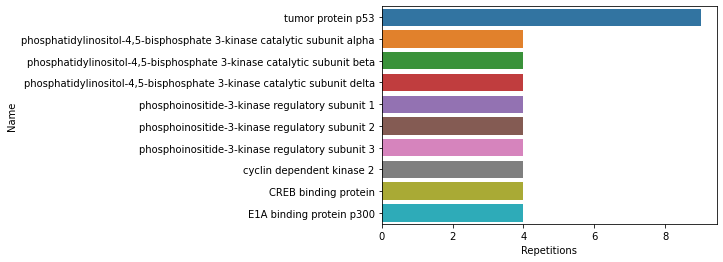

In [13]:
# Gráfica de barras representando genes que más se repiten y número de repeticiones
fig, ax = plt.subplots()
sns.barplot(x='Repetitions', y='Name', data=genes_data, ax=ax)
fig.savefig('figures/signif_genes.png', dpi=300)

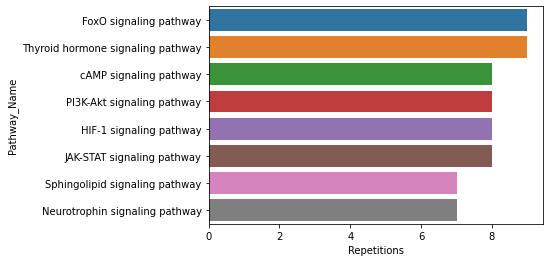

In [14]:
# Gráfica representando las vías de señalización más repetidas y el número de repeticiones
fig, ax = plt.subplots()
sns.barplot(x='Repetitions', y='Pathway_Name', data=signif_paths)
fig.savefig('figures/signif_pathways.png', dpi=300)

Podemos analizar también la distribución de las repeticiones, viendo cuántos genes o vías aparecen solo una vez, cuantos aparecen dos veces, y así sucesivamente. 

In [26]:
# Añadimos repeticiones de todos los genes, no solo los significativos
counts_total = counts.to_frame().reset_index()
counts_total.columns = ['Entry', 'Repetitions']

pathway_df = pathway_df.merge(counts_total)

<AxesSubplot:xlabel='Repetitions', ylabel='Count'>

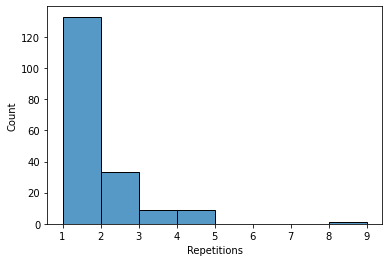

In [28]:
sns.histplot(data=pathway_df, x='Repetitions', binwidth=1)

In [31]:
pathway_df.Repetitions.value_counts()

1    133
2     33
3      9
4      9
9      1
Name: Repetitions, dtype: int64